## Covid Data - Handling Missing Values

### Objectives:
In this Notebook, we aim to:
- Analyse the covid data from [ourworldindata.org](https://)
- Identify the countries we intend to analyse
- Remove null values
- Write the cleaned data as a new CSV file

### Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np

### Reading the dataset into python

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(161390, 67)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161390 entries, 0 to 161389
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    161390 non-null  object 
 1   continent                                   151707 non-null  object 
 2   location                                    161390 non-null  object 
 3   date                                        161390 non-null  object 
 4   total_cases                                 158502 non-null  float64
 5   new_cases                                   158450 non-null  float64
 6   new_cases_smoothed                          157299 non-null  float64
 7   total_deaths                                140851 non-null  float64
 8   new_deaths                                  141019 non-null  float64
 9   new_deaths_smoothed                         140889 non-null  float64
 

- The dataset contains 67 columns and 161390 rows
- The Covid-19 information of about 230 countries from 2020 to 2022 is present

In [ ]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

### Selecting Countries

In [ ]:
countries_to_analyse = ['United States', 'India', 'Brazil', 'Canada', 'Russia', 'France', 'China', 'United Kingdom', 'Italy', 'Australia', 'Mexico', 'South Africa', 
                        'Kenya', 'Somalia', 'United Arab Emirates', 'Turkey']

In [ ]:
len(countries_to_analyse)

16

In [ ]:
df = df.loc[df['location'].isin(countries_to_analyse)]

In [ ]:
df.shape

(11819, 67)

- We select 16 countries from the dataset to perform our analysis
- Few countries from each continent are chosen; also preference is given to countries with high number of cases
- This brings the number of rows to 11819

The Chosen countries are:
- From Asia: India, China, United Arab Emirates
- From Africa: South Africa, Kenya, Somalia
- From Europe: France, United Kingdom, Italy
- From North America: United States, Canada, Mexico
- From South America: Brazil
- Transcontinental countries(Asia & Europe): Russia, Turkey
- Australia

### Checking and Handling Missing Values

In [ ]:
df.iloc[:, 0:20].isnull().sum()

iso_code                              0
continent                             0
location                              0
date                                  0
total_cases                          92
new_cases                           107
new_cases_smoothed                  187
total_deaths                        530
new_deaths                          535
new_deaths_smoothed                 540
total_cases_per_million              92
new_cases_per_million               107
new_cases_smoothed_per_million      187
total_deaths_per_million            530
new_deaths_per_million              535
new_deaths_smoothed_per_million     540
reproduction_rate                   624
icu_patients                       7755
icu_patients_per_million           7755
hosp_patients                      7749
dtype: int64

In [ ]:
df.iloc[:, 20:40].isnull().sum()

hosp_patients_per_million              7749
weekly_icu_admissions                 10698
weekly_icu_admissions_per_million     10698
weekly_hosp_admissions                 9060
weekly_hosp_admissions_per_million     9060
new_tests                              3231
total_tests                            2960
total_tests_per_thousand               2960
new_tests_per_thousand                 3231
new_tests_smoothed                     1980
new_tests_smoothed_per_thousand        1980
positive_rate                          2661
tests_per_case                         2715
tests_units                            1875
total_vaccinations                     6335
people_vaccinated                      6964
people_fully_vaccinated                7071
total_boosters                         9771
new_vaccinations                       6634
new_vaccinations_smoothed              5551
dtype: int64

In [ ]:
df.iloc[:, 40:].isnull().sum()

total_vaccinations_per_hundred                 6335
people_vaccinated_per_hundred                  6964
people_fully_vaccinated_per_hundred            7071
total_boosters_per_hundred                     9771
new_vaccinations_smoothed_per_million          5551
new_people_vaccinated_smoothed                 5767
new_people_vaccinated_smoothed_per_hundred     5767
stringency_index                                153
population                                        0
population_density                                0
median_age                                        0
aged_65_older                                     0
aged_70_older                                     0
gdp_per_capita                                  699
extreme_poverty                                2196
cardiovasc_death_rate                             0
diabetes_prevalence                               0
female_smokers                                  699
male_smokers                                    699
handwashing_

Removing Columns with more than 70% missing data

In [ ]:
high_null_columns = []
for column in df.columns:
    if df[column].isnull().sum() > 8000:
        high_null_columns.append(column)

In [ ]:
high_null_columns

['weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_boosters',
 'total_boosters_per_hundred',
 'handwashing_facilities',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']

In [ ]:
df.drop(columns=high_null_columns, axis = 1, inplace= True)

In [ ]:
df.shape

(11819, 56)

Removing cumulative columns that only give data per million/thousand/hundred

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
      

In [ ]:
columns_to_remove = []
for column in df.columns:
    if 'million' in column or 'thousand' in column or 'hundred' in column:
        columns_to_remove.append(column)

In [ ]:
columns_to_remove

['total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed_per_thousand',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'hospital_beds_per_thousand']

In [ ]:
df.drop(columns=columns_to_remove, axis = 1, inplace= True)

In [ ]:
df.shape

(11819, 39)

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'new_tests_smoothed',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'new_people_vaccinated_smoothed',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index'],
      dtype='object')

In [ ]:
df.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                         92
new_cases                          107
new_cases_smoothed                 187
total_deaths                       530
new_deaths                         535
new_deaths_smoothed                540
reproduction_rate                  624
icu_patients                      7755
hosp_patients                     7749
new_tests                         3231
total_tests                       2960
new_tests_smoothed                1980
positive_rate                     2661
tests_per_case                    2715
tests_units                       1875
total_vaccinations                6335
people_vaccinated                 6964
people_fully_vaccinated           7071
new_vaccinations                  6634
new_vaccinations_smoothed         5551
new_people_vaccinated_smoothed    5767
stringency_index         

In [ ]:
df.groupby('location')['icu_patients'].mean()

location
Australia                  71.833333
Brazil                           NaN
Canada                    530.045326
China                            NaN
France                   2561.060258
India                            NaN
Italy                    1343.601389
Kenya                            NaN
Mexico                           NaN
Russia                           NaN
Somalia                          NaN
South Africa                     NaN
Turkey                           NaN
United Arab Emirates             NaN
United Kingdom            990.048529
United States           14800.894281
Name: icu_patients, dtype: float64

In [ ]:
df['icu_patients'].loc[df['location'] == 'India'].isnull().sum()

745

In [ ]:
df['icu_patients'].loc[df['location'] == 'Brazil'].isnull().sum()

718

In [ ]:
df.drop(columns='icu_patients', axis=1, inplace = True)

In [ ]:
df.groupby('location')['hosp_patients'].mean()

location
Australia                 548.230994
Brazil                           NaN
Canada                   2244.694051
China                            NaN
France                  16880.628407
India                            NaN
Italy                   13020.023611
Kenya                            NaN
Mexico                           NaN
Russia                           NaN
Somalia                          NaN
South Africa                     NaN
Turkey                           NaN
United Arab Emirates             NaN
United Kingdom           9565.825073
United States           59877.377816
Name: hosp_patients, dtype: float64

In [ ]:
df.drop(columns='hosp_patients', axis=1, inplace=True)

- The columns: icu_patients and hosp_patients doesn't have data for several countries
- Since we have no reliable way to fill the details based on countries, we drop these columns

In [ ]:
df.loc[df['people_fully_vaccinated'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
8629,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8630,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8631,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8632,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8633,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152880,USA,North America,United States,2020-12-08,15300160.0,224497.0,210656.000,289725.0,2583.0,2335.143,1.11,1915526.0,217853476.0,1829272.0,0.119,8.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,71.76,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152881,USA,North America,United States,2020-12-09,15520774.0,220614.0,214014.000,292906.0,3181.0,2385.286,1.10,2124284.0,219977760.0,1832940.0,0.118,8.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,71.76,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152882,USA,North America,United States,2020-12-10,15754905.0,234131.0,216093.143,295892.0,2986.0,2387.714,1.09,2182129.0,222159889.0,1837855.0,0.117,8.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,71.76,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152883,USA,North America,United States,2020-12-11,15995350.0,240445.0,216921.143,299273.0,3381.0,2497.571,1.08,2056704.0,224216593.0,1829043.0,0.117,8.5,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,71.76,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926


- The vaccination related columns have null values in the first few rows because there were no vaccines in those times.
- So we fill these columns with zero, as essentially there were zero vaccinated people in those dates.

In [ ]:
vaccine_columns = []
for column in df.columns:
    if 'vaccin' in column:
        vaccine_columns.append(column)

In [ ]:
vaccine_columns

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'new_people_vaccinated_smoothed']

In [ ]:
df[vaccine_columns] = df[vaccine_columns].fillna(0)

In [ ]:
df[vaccine_columns].isnull().sum()

total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
new_vaccinations                  0
new_vaccinations_smoothed         0
new_people_vaccinated_smoothed    0
dtype: int64

In [ ]:
df.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                         92
new_cases                          107
new_cases_smoothed                 187
total_deaths                       530
new_deaths                         535
new_deaths_smoothed                540
reproduction_rate                  624
new_tests                         3231
total_tests                       2960
new_tests_smoothed                1980
positive_rate                     2661
tests_per_case                    2715
tests_units                       1875
total_vaccinations                   0
people_vaccinated                    0
people_fully_vaccinated              0
new_vaccinations                     0
new_vaccinations_smoothed            0
new_people_vaccinated_smoothed       0
stringency_index                   153
population                           0
population_density       

In [ ]:
df.groupby('location')['new_tests'].mean()

location
Australia               8.804062e+04
Brazil                  1.396434e+05
Canada                  8.077294e+04
China                            NaN
France                  3.772134e+05
India                   1.090782e+06
Italy                   2.501090e+05
Kenya                   3.254717e+03
Mexico                  1.802237e+04
Russia                  3.312060e+05
Somalia                          NaN
South Africa            3.221747e+04
Turkey                  1.983327e+05
United Arab Emirates    1.828510e+05
United Kingdom          6.628632e+05
United States           1.121902e+06
Name: new_tests, dtype: float64

In [ ]:
df.loc[df['new_tests'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
8629,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8630,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8631,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8632,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8633,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153307,USA,North America,United States,2022-02-08,77083020.0,221362.0,242331.857,909233.0,2903.0,2444.429,0.54,NaN,NaN,NaN,NaN,NaN,NaN,545860620.0,251734003.0,212735838.0,435742.0,441428.0,114388.0,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
153308,USA,North America,United States,2022-02-09,77270319.0,187299.0,222371.000,912668.0,3435.0,2424.857,0.53,NaN,NaN,NaN,NaN,NaN,NaN,546283533.0,251842134.0,212857378.0,422913.0,426766.0,110437.0,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
153309,USA,North America,United States,2022-02-10,77441181.0,170862.0,210609.714,915847.0,3179.0,2555.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546575666.0,251915060.0,212940602.0,292133.0,399747.0,103049.0,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
153310,USA,North America,United States,2022-02-11,77650446.0,209265.0,187509.143,918451.0,2604.0,2330.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546624663.0,251926344.0,212953838.0,48997.0,320085.0,83466.0,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926


In [ ]:
df['date'].head()

8629    2020-01-26
8630    2020-01-27
8631    2020-01-28
8632    2020-01-29
8633    2020-01-30
Name: date, dtype: object

In [ ]:
df[['location', 'date', 'new_tests']].loc[(df['location'] == 'China') & (df['new_tests'].isnull() == True)]

,location,date,new_tests
30600,China,2020-01-22,NaN
30601,China,2020-01-23,NaN
30602,China,2020-01-24,NaN
30603,China,2020-01-25,NaN
30604,China,2020-01-26,NaN
...,...,...,...
31348,China,2022-02-08,NaN
31349,China,2022-02-09,NaN
31350,China,2022-02-10,NaN
31351,China,2022-02-11,NaN


In [ ]:
df[['location', 'date', 'new_tests']].loc[(df['location'] == 'Somalia') & (df['new_tests'].isnull() == True)]

,location,date,new_tests
133160,Somalia,2020-03-16,NaN
133161,Somalia,2020-03-17,NaN
133162,Somalia,2020-03-18,NaN
133163,Somalia,2020-03-19,NaN
133164,Somalia,2020-03-20,NaN
...,...,...,...
133854,Somalia,2022-02-08,NaN
133855,Somalia,2022-02-09,NaN
133856,Somalia,2022-02-10,NaN
133857,Somalia,2022-02-11,NaN


In [ ]:
tests_columns = []
for column in df.columns:
    if 'test' in column:
        tests_columns.append(column)

In [ ]:
tests_columns.append('positive_rate')

In [ ]:
tests_columns

['new_tests',
 'total_tests',
 'new_tests_smoothed',
 'tests_per_case',
 'tests_units',
 'positive_rate']

In [ ]:
df.drop(columns=tests_columns, axis = 1, inplace = True)

- Since test related data is missing for several countries, there is no point in keeping those features.

In [ ]:
df.shape

(11819, 31)

In [ ]:
df.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                         92
new_cases                          107
new_cases_smoothed                 187
total_deaths                       530
new_deaths                         535
new_deaths_smoothed                540
reproduction_rate                  624
total_vaccinations                   0
people_vaccinated                    0
people_fully_vaccinated              0
new_vaccinations                     0
new_vaccinations_smoothed            0
new_people_vaccinated_smoothed       0
stringency_index                   153
population                           0
population_density                   0
median_age                           0
aged_65_older                        0
aged_70_older                        0
gdp_per_capita                     699
extreme_poverty                   2196
cardiovasc_death_rate    

Most of the data for Somalia is missing. So we drop the country from our analysis list.

In [ ]:
df.drop(df.loc[df['location'] == 'Somalia'].index, inplace=True)

In [ ]:
df['location'].value_counts()

Mexico                  774
China                   753
United States           753
France                  751
Australia               749
Canada                  749
United Arab Emirates    746
India                   745
Italy                   744
Russia                  744
United Kingdom          744
South Africa            737
Brazil                  718
Kenya                   709
Turkey                  704
Name: location, dtype: int64

In [ ]:
df.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                         92
new_cases                          102
new_cases_smoothed                 177
total_deaths                       507
new_deaths                         512
new_deaths_smoothed                517
reproduction_rate                  588
total_vaccinations                   0
people_vaccinated                    0
people_fully_vaccinated              0
new_vaccinations                     0
new_vaccinations_smoothed            0
new_people_vaccinated_smoothed       0
stringency_index                   148
population                           0
population_density                   0
median_age                           0
aged_65_older                        0
aged_70_older                        0
gdp_per_capita                       0
extreme_poverty                   1497
cardiovasc_death_rate    

In [ ]:
df.loc[df['extreme_poverty'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
52255,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,82.66,0.901
52256,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,82.66,0.901
52257,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,82.66,0.901
52258,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,82.66,0.901
52259,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151810,ARE,Asia,United Arab Emirates,2022-02-08,860976.0,1615.0,1976.286,2269.0,4.0,3.000,0.82,23730752.0,0.0,9366101.0,20362.0,24840.0,2.0,NaN,9991083.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.84,17.26,1.2,37.4,77.97,0.890
151811,ARE,Asia,United Arab Emirates,2022-02-09,862514.0,1538.0,1887.000,2273.0,4.0,3.143,0.82,23755550.0,0.0,0.0,24798.0,24499.0,2.0,NaN,9991083.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.84,17.26,1.2,37.4,77.97,0.890
151812,ARE,Asia,United Arab Emirates,2022-02-10,864102.0,1588.0,1795.000,2278.0,5.0,3.571,NaN,23781095.0,9890245.0,9375953.0,25545.0,24079.0,2.0,NaN,9991083.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.84,17.26,1.2,37.4,77.97,0.890
151813,ARE,Asia,United Arab Emirates,2022-02-11,865576.0,1474.0,1703.571,2283.0,5.0,3.571,NaN,23807035.0,9890339.0,9385932.0,25940.0,23183.0,15.0,NaN,9991083.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.84,17.26,1.2,37.4,77.97,0.890


In [ ]:
df.groupby('location')['extreme_poverty'].mean()

location
Australia                0.5
Brazil                   3.4
Canada                   0.5
China                    0.7
France                   NaN
India                   21.2
Italy                    2.0
Kenya                   36.8
Mexico                   2.5
Russia                   0.1
South Africa            18.9
Turkey                   0.2
United Arab Emirates     NaN
United Kingdom           0.2
United States            1.2
Name: extreme_poverty, dtype: float64

In [ ]:
df.loc[df['location'] == 'France', 'extreme_poverty'] = df.loc[df['location'] == 'France', 'extreme_poverty'].fillna(13.6)

In [ ]:
df['extreme_poverty'].isnull().sum()

746

In [ ]:
df.loc[df['location'] == 'United Arab Emirates', 'extreme_poverty'] = df.loc[df['location'] == 'United Arab Emirates', 'extreme_poverty'].fillna(19.5)

In [ ]:
df['extreme_poverty'].isnull().sum()

0

- The extreme poverty column contains the percentage of the population living in extreme poverty
- The data for France and UAE was missing
- From WorldBank website, we find the required data and fill with those.

In [ ]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                        92
new_cases                         102
new_cases_smoothed                177
total_deaths                      507
new_deaths                        512
new_deaths_smoothed               517
reproduction_rate                 588
total_vaccinations                  0
people_vaccinated                   0
people_fully_vaccinated             0
new_vaccinations                    0
new_vaccinations_smoothed           0
new_people_vaccinated_smoothed      0
stringency_index                  148
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cardiovasc_death_rate               0
diabetes_pre

In [ ]:
df.loc[df['total_deaths'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
8629,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8630,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8631,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8632,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
8633,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152592,USA,North America,United States,2020-02-24,16.0,0.0,0.286,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152593,USA,North America,United States,2020-02-25,16.0,0.0,0.286,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152594,USA,North America,United States,2020-02-26,16.0,0.0,0.286,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926
152595,USA,North America,United States,2020-02-27,17.0,1.0,0.429,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.56,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926


In [ ]:
df.loc[df['location'] == 'China'].loc[df['new_deaths'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
30600,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,26.39,1.444216e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,76.91,0.761


- To proceed further, we have to convert date column datatype from object to datetime

In [ ]:
locations = df['location'].unique() #list of countries

In [ ]:
df['date'] = pd.to_datetime(df['date']) #converting to datetime

**Creating a filter to unify the starting dates of each countries.**

In [ ]:
mask = (df['date'] >= '2020-1-1') & (df['date'] <= '2020-3-11')

In [ ]:
df.drop(df.loc[mask].index, inplace = True)

**Checking if the starting date is uniform across locations**

In [ ]:
for each in locations:
    print(df['date'].loc[df['location'] == each].head(1))

8675   2020-03-12
Name: date, dtype: datetime64[ns]
20688   2020-03-12
Name: date, dtype: datetime64[ns]
26383   2020-03-12
Name: date, dtype: datetime64[ns]
30650   2020-03-12
Name: date, dtype: datetime64[ns]
52303   2020-03-12
Name: date, dtype: datetime64[ns]
67675   2020-03-12
Name: date, dtype: datetime64[ns]
73448   2020-03-12
Name: date, dtype: datetime64[ns]
77358   2020-03-12
Name: date, dtype: datetime64[ns]
95186   2020-03-12
Name: date, dtype: datetime64[ns]
120126   2020-03-12
Name: date, dtype: datetime64[ns]
133893   2020-03-12
Name: date, dtype: datetime64[ns]
147911   2020-03-12
Name: date, dtype: datetime64[ns]
151112   2020-03-12
Name: date, dtype: datetime64[ns]
151856   2020-03-12
Name: date, dtype: datetime64[ns]
152609   2020-03-12
Name: date, dtype: datetime64[ns]


In [ ]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         1
new_cases                           9
new_cases_smoothed                 18
total_deaths                       61
new_deaths                         65
new_deaths_smoothed                65
reproduction_rate                 107
total_vaccinations                  0
people_vaccinated                   0
people_fully_vaccinated             0
new_vaccinations                    0
new_vaccinations_smoothed           0
new_people_vaccinated_smoothed      0
stringency_index                  148
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cardiovasc_death_rate               0
diabetes_pre

In [ ]:
df.loc[df['total_cases'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
77358,KEN,Africa,Kenya,2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,13.89,54985702.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,66.7,0.601


In [ ]:
df.loc[df['location'] == 'Kenya', 'total_cases'] = df.loc[df['location'] == 'Kenya', 'total_cases'].fillna(0)

Kenya has null values in total cases during the beginning of outbreak; so replacing with zero.

In [ ]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           9
new_cases_smoothed                 18
total_deaths                       61
new_deaths                         65
new_deaths_smoothed                65
reproduction_rate                 107
total_vaccinations                  0
people_vaccinated                   0
people_fully_vaccinated             0
new_vaccinations                    0
new_vaccinations_smoothed           0
new_people_vaccinated_smoothed      0
stringency_index                  148
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cardiovasc_death_rate               0
diabetes_pre

In [ ]:
df.loc[df['new_cases'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
21243,BRA,South America,Brazil,2021-09-18,21234573.0,NaN,NaN,590766.0,586.0,564.143,1.61,222156927.0,146371189.0,80250454.0,1085332.0,1561928.0,510443.0,54.17,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
52326,FRA,Europe,France,2020-04-04,47319.0,NaN,NaN,7562.0,1052.0,749.714,1.24,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.060,4.77,30.1,35.6,82.66,0.901
52329,FRA,Europe,France,2020-04-07,47329.0,NaN,NaN,10330.0,1416.0,972.000,1.08,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.060,4.77,30.1,35.6,82.66,0.901
52540,FRA,Europe,France,2020-11-04,1583814.0,NaN,NaN,38692.0,-35.0,413.714,1.24,0.0,0.0,0.0,0.0,0.0,0.0,78.70,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.060,4.77,30.1,35.6,82.66,0.901
52737,FRA,Europe,France,2021-05-20,5610476.0,NaN,NaN,108329.0,133.0,152.000,0.83,32126742.0,22677199.0,9609905.0,669744.0,534249.0,405870.0,54.63,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.060,4.77,30.1,35.6,82.66,0.901
77358,KEN,Africa,Kenya,2020-03-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,13.89,54985702.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,66.70,0.601
134514,ZAF,Africa,South Africa,2021-11-23,2948760.0,NaN,NaN,89635.0,51.0,18.714,1.16,24874528.0,16781364.0,14031159.0,120212.0,93989.0,53789.0,45.37,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,64.13,0.709
148184,TUR,Asia,Turkey,2020-12-10,1748567.0,NaN,NaN,15751.0,220.0,205.000,0.76,0.0,0.0,0.0,0.0,0.0,0.0,62.50,85042736.0,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,77.69,0.820
152546,GBR,Europe,United Kingdom,2022-01-31,17357945.0,NaN,NaN,155885.0,57.0,263.286,1.63,138143343.0,52360487.0,48440773.0,78666.0,95550.0,15415.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932


In [ ]:
df.loc[df['location'] == 'France'].loc[df['date'] >= '2020-04-03']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
52325,FRA,Europe,France,2020-04-03,64395.0,5223.0,4485.000,6510.0,1122.0,644.857,1.29,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
52326,FRA,Europe,France,2020-04-04,47319.0,846.0,NaN,7562.0,1052.0,749.714,1.24,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
52327,FRA,Europe,France,2020-04-05,48165.0,846.0,3570.000,8081.0,519.0,781.857,1.19,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
52328,FRA,Europe,France,2020-04-06,50823.0,2658.0,3329.286,8914.0,833.0,841.286,1.13,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
52329,FRA,Europe,France,2020-04-07,47329.0,3851.0,NaN,10330.0,1416.0,972.000,1.08,0.0,0.0,0.0,0.0,0.0,0.0,87.96,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53001,FRA,Europe,France,2022-02-08,21091589.0,235267.0,211716.143,133681.0,691.0,328.857,0.71,138388435.0,53862830.0,51822696.0,210389.0,201082.0,9111.0,69.44,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
53002,FRA,Europe,France,2022-02-09,21091589.0,0.0,166664.286,133681.0,0.0,289.429,0.69,138608021.0,53872214.0,51866089.0,219586.0,199579.0,8662.0,69.44,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
53003,FRA,Europe,France,2022-02-10,21424815.0,333226.0,175074.857,134336.0,655.0,345.286,NaN,138792313.0,53879448.0,51901094.0,184292.0,196426.0,8231.0,69.44,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901
53004,FRA,Europe,France,2022-02-11,21556191.0,131376.0,159407.286,134605.0,269.0,333.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,69.44,67422000.0,122.578,42.0,19.718,13.079,38605.671,13.6,86.06,4.77,30.1,35.6,82.66,0.901


In [ ]:
df.groupby('location')['new_cases'].mean()

location
Australia                 4128.258890
Brazil                   38902.236467
Canada                    4531.920341
China                       37.190612
France                   31599.977110
India                    60642.046942
Italy                    17127.834993
Kenya                      459.310541
Mexico                    7516.136558
Russia                   19527.906117
South Africa              5158.921652
Turkey                   17110.125356
United Arab Emirates      1233.139403
United Kingdom           24875.505698
United States           110535.137980
Name: new_cases, dtype: float64

- Random values are missing in new_cases column
- So we fill with ffill method which fills with last valid observation before null value

In [ ]:
df['new_cases'].fillna(method='bfill', inplace = True)

In [ ]:
df['new_cases'].isnull().sum()

0

In [ ]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                 18
total_deaths                       61
new_deaths                         65
new_deaths_smoothed                65
reproduction_rate                 107
total_vaccinations                  0
people_vaccinated                   0
people_fully_vaccinated             0
new_vaccinations                    0
new_vaccinations_smoothed           0
new_people_vaccinated_smoothed      0
stringency_index                  148
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cardiovasc_death_rate               0
diabetes_pre

#### Stringency Index:
Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)

- We were able to find the data for China, Mexico, & UAE stringency index where the values are missing.
- Other locations, there is no change in value, so we fill with ffill

In [ ]:
stg_index_loc1 = ['China', 'Mexico', 'United Arab Emirates']
stg_index_val1 = [64.35, 35.19, 50.0]

In [ ]:
for loc, val in zip(stg_index_loc1, stg_index_val1):
    df.loc[df['location'] == loc, 'stringency_index'] = df.loc[df['location'] == loc, 'stringency_index'].fillna(val)

In [ ]:
stg_index_loc2 = ['Canada', 'France', 'India', 'Italy', 'Kenya', 'Mexico', 'Russia', 'South Africa', 'Turkey', 'United Kingdom', 'United States']
for loc in stg_index_loc2:
    df.loc[df['location'] == loc, 'stringency_index'] = df.loc[df['location'] == loc, 'stringency_index'].fillna(method='ffill')

In [ ]:
df['stringency_index'].isnull().sum()

0

In [ ]:
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                 18
total_deaths                       61
new_deaths                         65
new_deaths_smoothed                65
reproduction_rate                 107
total_vaccinations                  0
people_vaccinated                   0
people_fully_vaccinated             0
new_vaccinations                    0
new_vaccinations_smoothed           0
new_people_vaccinated_smoothed      0
stringency_index                    0
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cardiovasc_death_rate               0
diabetes_pre

#### Reproduction Rate
Real-time estimate of the effective reproduction rate (R) of COVID-19

- For cases before April of 2020, the reproduction rate is essentially zero for many of the countries
- So we fill with zero in those dates
- ffill is used for other cases

In [ ]:
df[['reproduction_rate', 'location', 'date', 'new_cases']].loc[df['reproduction_rate'].isnull() == True].loc[df['location'] == 'Mexico']

,reproduction_rate,location,date,new_cases
95186,NaN,Mexico,2020-03-12,4.0
95187,NaN,Mexico,2020-03-13,14.0
95188,NaN,Mexico,2020-03-14,15.0
95189,NaN,Mexico,2020-03-15,12.0
95190,NaN,Mexico,2020-03-16,29.0
95191,NaN,Mexico,2020-03-17,11.0
95192,NaN,Mexico,2020-03-18,25.0
95886,NaN,Mexico,2022-02-10,0.0
95887,NaN,Mexico,2022-02-11,34261.0
95888,NaN,Mexico,2022-02-12,57583.0


In [ ]:
df.loc[df['date'] < '2020-04-20', 'reproduction_rate'] = df.loc[df['date'] < '2020-04-20', 'reproduction_rate'].fillna(0)

In [ ]:
df['reproduction_rate'].fillna(method = 'ffill', inplace = True)

In [ ]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                18
total_deaths                      61
new_deaths                        65
new_deaths_smoothed               65
reproduction_rate                  0
total_vaccinations                 0
people_vaccinated                  0
people_fully_vaccinated            0
new_vaccinations                   0
new_vaccinations_smoothed          0
new_people_vaccinated_smoothed     0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
f

In [ ]:
df.loc[df['total_deaths'].isnull() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
20688,BRA,South America,Brazil,2020-03-12,52.0,14.0,6.857,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.70,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
20689,BRA,South America,Brazil,2020-03-13,151.0,99.0,19.714,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,37.96,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
20690,BRA,South America,Brazil,2020-03-14,151.0,0.0,19.714,NaN,NaN,NaN,2.26,0.0,0.0,0.0,0.0,0.0,0.0,42.13,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
20691,BRA,South America,Brazil,2020-03-15,162.0,11.0,20.286,NaN,NaN,NaN,2.37,0.0,0.0,0.0,0.0,0.0,0.0,42.13,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
20692,BRA,South America,Brazil,2020-03-16,200.0,38.0,25.000,NaN,NaN,NaN,2.61,0.0,0.0,0.0,0.0,0.0,0.0,42.13,213993441.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151115,ARE,Asia,United Arab Emirates,2020-03-15,98.0,13.0,7.571,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,34.26,9991083.0,112.442,34.0,1.144,0.526,67293.483,19.5,317.840,17.26,1.2,37.4,77.97,0.890
151116,ARE,Asia,United Arab Emirates,2020-03-16,98.0,0.0,7.571,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,0.526,67293.483,19.5,317.840,17.26,1.2,37.4,77.97,0.890
151117,ARE,Asia,United Arab Emirates,2020-03-17,98.0,0.0,3.429,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,0.526,67293.483,19.5,317.840,17.26,1.2,37.4,77.97,0.890
151118,ARE,Asia,United Arab Emirates,2020-03-18,113.0,15.0,5.571,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,0.526,67293.483,19.5,317.840,17.26,1.2,37.4,77.97,0.890


In [ ]:
df[[ 'location', 'date', 'total_deaths', 'new_cases']].loc[df['total_deaths'].isnull() == True].loc[df['location'] == 'United Arab Emirates']

,location,date,total_deaths,new_cases
151112,United Arab Emirates,2020-03-12,NaN,11.0
151113,United Arab Emirates,2020-03-13,NaN,0.0
151114,United Arab Emirates,2020-03-14,NaN,0.0
151115,United Arab Emirates,2020-03-15,NaN,13.0
151116,United Arab Emirates,2020-03-16,NaN,0.0
151117,United Arab Emirates,2020-03-17,NaN,0.0
151118,United Arab Emirates,2020-03-18,NaN,15.0
151119,United Arab Emirates,2020-03-19,NaN,27.0


- Total deaths were zero in the beginning of the outbreak, so filling with zero

In [ ]:
df['total_deaths'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                18
total_deaths                       0
new_deaths                        65
new_deaths_smoothed               65
reproduction_rate                  0
total_vaccinations                 0
people_vaccinated                  0
people_fully_vaccinated            0
new_vaccinations                   0
new_vaccinations_smoothed          0
new_people_vaccinated_smoothed     0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
f

**new_cases_smoothed is the 7 day simple moving average of new_cases column. We can calculate a new smoothed column using rolling function in pandas and remove old smoothed column to fix missing values.**

In [ ]:
df[['location', 'date', 'new_cases', 'new_cases_smoothed']].loc[df['new_cases_smoothed'].isnull() == True]

,location,date,new_cases,new_cases_smoothed
21243,Brazil,2021-09-18,9175.0,NaN
52326,France,2020-04-04,846.0,NaN
52329,France,2020-04-07,3851.0,NaN
52540,France,2020-11-04,57352.0,NaN
52737,France,2021-05-20,12800.0,NaN
77358,Kenya,2020-03-12,1.0,NaN
77359,Kenya,2020-03-13,1.0,NaN
77360,Kenya,2020-03-14,0.0,NaN
77361,Kenya,2020-03-15,2.0,NaN
77362,Kenya,2020-03-16,0.0,NaN


In [ ]:
df['new_cases_sma'] = 0
countries = df['location'].unique()

In [ ]:
for country in countries: # calcualte simple moving 7 day average based on country
    df.loc[df['location'] == country, 'new_cases_sma'] = round(df.loc[df['location'] == country, 'new_cases'].rolling(window=7).mean(), 3)

In [ ]:
df['new_cases_sma'].fillna(0, inplace = True)

In [ ]:
df['new_cases_sma'].isnull().sum()

0

In [ ]:
df.drop(columns='new_cases_smoothed', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                        65
new_deaths_smoothed               65
reproduction_rate                  0
total_vaccinations                 0
people_vaccinated                  0
people_fully_vaccinated            0
new_vaccinations                   0
new_vaccinations_smoothed          0
new_people_vaccinated_smoothed     0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
m

- new_deaths column is the difference of consecutive total_deaths rows. 
- Most of the null values are due to zero deaths in the beginning of the outbreak
- Others can be calculated manually
- So we use these two approaches to fill these values

In [ ]:
df['location'].loc[df['new_deaths'].isnull() == True].unique()

array(['Brazil', 'India', 'Kenya', 'Mexico', 'Russia', 'South Africa',
       'Turkey', 'United Arab Emirates', 'United Kingdom'], dtype=object)

In [ ]:
df.loc[(df['location']=='United Kingdom') & (df['new_deaths'].isnull() == True)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,new_cases_sma
152547,GBR,Europe,United Kingdom,2022-02-01,17470812.0,112867.0,157008.0,NaN,NaN,1.44,138220429.0,52373222.0,48467140.0,77086.0,92810.0,15244.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,92551.286


In [ ]:
df.loc[(df['location']=='United Kingdom') & (df['date'] > '2022-01-30')]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,new_cases_sma
152546,GBR,Europe,United Kingdom,2022-01-31,17357945.0,112867.0,155885.0,57.0,263.286,1.63,138143343.0,52360487.0,48440773.0,78666.0,95550.0,15415.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,89928.429
152547,GBR,Europe,United Kingdom,2022-02-01,17470812.0,112867.0,157008.0,NaN,NaN,1.44,138220429.0,52373222.0,48467140.0,77086.0,92810.0,15244.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,92551.286
152548,GBR,Europe,United Kingdom,2022-02-02,17558231.0,87419.0,157542.0,534.0,226.857,1.27,138299206.0,52385688.0,48494414.0,78777.0,89672.0,14831.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,90457.429
152549,GBR,Europe,United Kingdom,2022-02-03,17651284.0,93053.0,157865.0,323.0,224.714,1.13,138377561.0,52399031.0,48520513.0,78355.0,86779.0,14493.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,89951.143
152550,GBR,Europe,United Kingdom,2022-02-04,17733624.0,82340.0,158119.0,254.0,221.286,1.02,138459789.0,52414182.0,48549694.0,82228.0,83053.0,14236.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,89012.571
152551,GBR,Europe,United Kingdom,2022-02-05,17793738.0,60114.0,158378.0,259.0,216.000,0.93,138540476.0,52428976.0,48577889.0,80687.0,78398.0,13643.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,87294.143
152552,GBR,Europe,United Kingdom,2022-02-06,17847064.0,53326.0,158453.0,75.0,214.571,0.85,138585207.0,52437297.0,48594494.0,44731.0,74361.0,13163.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,85998.000
152553,GBR,Europe,United Kingdom,2022-02-07,17911386.0,64322.0,158498.0,45.0,212.857,0.77,138650801.0,52447403.0,48617355.0,65594.0,72494.0,12417.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,79063.000
152554,GBR,Europe,United Kingdom,2022-02-08,17978020.0,66634.0,158814.0,316.0,258.000,0.78,138718046.0,52458207.0,48642076.0,67245.0,71088.0,12141.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,72458.286
152555,GBR,Europe,United Kingdom,2022-02-09,18045697.0,67677.0,159090.0,276.0,221.143,0.78,138785770.0,52468730.0,48666801.0,67724.0,69509.0,11863.0,42.13,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,81.32,0.932,69638.000


All columns in the beginning with null values in new_deaths are filled with zero using date filtering

In [ ]:
df.loc[df['date'] < '2020-04-01', 'new_deaths'] = df.loc[df['date'] < '2020-04-01', 'new_deaths'].fillna(0)

In [ ]:
df['new_deaths'].isnull().sum()

4

Filling with manually calculated values

In [ ]:
new_death_loc = ['India', 'Mexico', 'South Africa', 'United Kingdom']
new_death_val = [7304, 4272, 551, 1123]

In [ ]:
for loc, val in zip(new_death_loc, new_death_val):
    df.loc[df['location'] == loc, 'new_deaths'] = df.loc[df['location'] == loc, 'new_deaths'].fillna(val)

In [ ]:
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed               65
reproduction_rate                  0
total_vaccinations                 0
people_vaccinated                  0
people_fully_vaccinated            0
new_vaccinations                   0
new_vaccinations_smoothed          0
new_people_vaccinated_smoothed     0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cardiovasc_death_rate              0
diabetes_prevalence                0
female_smokers                     0
m

- new_deaths_smoothed is the 7 day simple moving average of new_deaths.
- We can calculate this using rolling function like before

In [ ]:
df.loc[(df['location'] == 'Mexico') & (df['new_deaths_smoothed'].isnull() == True)]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,new_cases_sma
95186,MEX,North America,Mexico,2020-03-12,12.0,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95187,MEX,North America,Mexico,2020-03-13,26.0,14.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95188,MEX,North America,Mexico,2020-03-14,41.0,15.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95189,MEX,North America,Mexico,2020-03-15,53.0,12.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95190,MEX,North America,Mexico,2020-03-16,82.0,29.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95191,MEX,North America,Mexico,2020-03-17,93.0,11.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,0.000
95192,MEX,North America,Mexico,2020-03-18,118.0,25.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.78,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,15.714
95632,MEX,North America,Mexico,2021-06-01,2420659.0,6917.0,227840.0,4272.0,NaN,1.1,30990908.0,22043213.0,12604789.0,513205.0,576731.0,490364.0,44.44,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,75.05,0.779,2981.286


Creating a new moving average column

In [ ]:
df['new_deaths_sma'] = 0

In [ ]:
countries = df['location'].unique()

In [ ]:
for country in countries:
    df.loc[df['location'] == country, 'new_deaths_sma'] = round(df.loc[df['location'] == country, 'new_deaths'].rolling(window=7).mean(), 3)

In [ ]:
df[['new_deaths', 'new_deaths_smoothed', 'new_deaths_sma']].loc[(df['location'] == 'Mexico') & (df['date'] > '2020-03-11') & (df['date'] < '2020-03-28')]

,new_deaths,new_deaths_smoothed,new_deaths_sma
95186,0.0,NaN,NaN
95187,0.0,NaN,NaN
95188,0.0,NaN,NaN
95189,0.0,NaN,NaN
95190,0.0,NaN,NaN
95191,0.0,NaN,NaN
95192,0.0,NaN,0.000
95193,1.0,0.143,0.143
95194,1.0,0.286,0.286
95195,0.0,0.286,0.286


In [ ]:
df['new_deaths_sma'].isnull().sum()

90

In [ ]:
df['new_deaths_sma'].fillna(0, inplace=True)

In [ ]:
df['new_deaths_sma'].isnull().sum()

0

In [ ]:
df.drop(columns='new_deaths_smoothed', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
total_deaths                      0
new_deaths                        0
reproduction_rate                 0
total_vaccinations                0
people_vaccinated                 0
people_fully_vaccinated           0
new_vaccinations                  0
new_vaccinations_smoothed         0
new_people_vaccinated_smoothed    0
stringency_index                  0
population                        0
population_density                0
median_age                        0
aged_65_older                     0
aged_70_older                     0
gdp_per_capita                    0
extreme_poverty                   0
cardiovasc_death_rate             0
diabetes_prevalence               0
female_smokers                    0
male_smokers                      0
life_expectancy             

**Resetting Index**

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,new_cases_sma,new_deaths_sma
0,AUS,Oceania,Australia,2020-03-12,128.0,0.0,3.0,0.0,2.17,0.0,0.0,0.0,0.0,0.0,0.0,19.44,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.000,0.000
1,AUS,Oceania,Australia,2020-03-13,200.0,72.0,3.0,0.0,2.34,0.0,0.0,0.0,0.0,0.0,0.0,19.44,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.000,0.000
2,AUS,Oceania,Australia,2020-03-14,250.0,50.0,3.0,0.0,2.32,0.0,0.0,0.0,0.0,0.0,0.0,19.44,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.000,0.000
3,AUS,Oceania,Australia,2020-03-15,297.0,47.0,3.0,0.0,2.33,0.0,0.0,0.0,0.0,0.0,0.0,19.44,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.000,0.000
4,AUS,Oceania,Australia,2020-03-16,377.0,80.0,3.0,0.0,2.39,0.0,0.0,0.0,0.0,0.0,0.0,30.56,25788217.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10540,USA,North America,United States,2022-02-08,77083020.0,221362.0,909233.0,2903.0,0.54,545860620.0,251734003.0,212735838.0,435742.0,441428.0,114388.0,58.80,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926,242331.857,2444.429
10541,USA,North America,United States,2022-02-09,77270319.0,187299.0,912668.0,3435.0,0.53,546283533.0,251842134.0,212857378.0,422913.0,426766.0,110437.0,58.80,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926,222371.000,2424.857
10542,USA,North America,United States,2022-02-10,77441181.0,170862.0,915847.0,3179.0,0.53,546575666.0,251915060.0,212940602.0,292133.0,399747.0,103049.0,58.80,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926,210609.714,2555.429
10543,USA,North America,United States,2022-02-11,77650446.0,209265.0,918451.0,2604.0,0.53,546624663.0,251926344.0,212953838.0,48997.0,320085.0,83466.0,58.80,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,78.86,0.926,187509.143,2330.714


**Writing cleaned data as a new csv file: cleaned_covid.csv**

In [ ]:
#df.to_csv('cleaned_covid.csv', index=False)

## Time series preprocessing

In [ ]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 14.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Data/cleaned_covid.csv')

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,reproduction_rate,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,new_deaths_sma
0,AUS,Oceania,Australia,2020-03-12,128.0,0.0,10.429,3.0,0.0,2.17,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.0
1,AUS,Oceania,Australia,2020-03-13,200.0,72.0,20.000,3.0,0.0,2.34,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.0
2,AUS,Oceania,Australia,2020-03-14,250.0,50.0,26.714,3.0,0.0,2.32,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.0
3,AUS,Oceania,Australia,2020-03-15,297.0,47.0,31.571,3.0,0.0,2.33,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.0
4,AUS,Oceania,Australia,2020-03-16,377.0,80.0,40.857,3.0,0.0,2.39,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,83.44,0.944,0.0


Converting to datetime for time series forecasting

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

Selecting India for Forecasting

In [ ]:
india_cases = df.loc[df['location'] == 'India']

In [ ]:
india_cases = india_cases[['date', 'new_cases']]

In [ ]:
india_cases.head()

,date,new_cases
3515,2020-03-12,11.0
3516,2020-03-13,9.0
3517,2020-03-14,20.0
3518,2020-03-15,11.0
3519,2020-03-16,6.0


Setting date column as index

In [ ]:
india_cases.set_index('date', inplace=True)

In [ ]:
india_cases.head()

,new_cases
date,
2020-03-12,11.0
2020-03-13,9.0
2020-03-14,20.0
2020-03-15,11.0
2020-03-16,6.0


Plot of new cases in India from 2020-2022

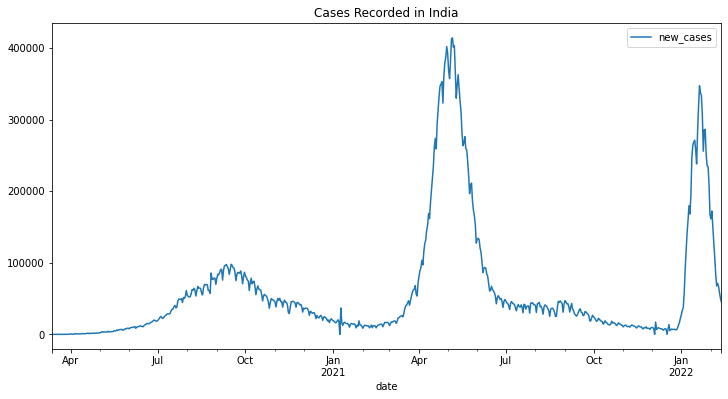

In [ ]:
india_cases.plot(figsize=(12, 6), title='Cases Recorded in India')
plt.show()

In [ ]:
india_cases.describe()

,new_cases
count,703.000000
mean,60642.046942
std,84333.050716
min,0.000000
25%,12779.500000
50%,32981.000000
75%,62241.000000
max,414188.000000


In [ ]:
india_cases.loc[india_cases['new_cases'] == 0]

,new_cases
date,
2021-01-08,0.0
2021-12-04,0.0
2021-12-17,0.0


There are zeroes in random places; this is due to problems in original dataset. We are replacing them with ffill

In [ ]:
india_cases.replace(to_replace=0, method='ffill', inplace=True)

new_cases    None
dtype: object

### Seasonal Decomposition

Seasonal decomposition into three components, namely seasonality, trend and remaining residuals is performed to get a better insight into the series.

In [ ]:
decomp = seasonal_decompose(india_cases, model='additive')

#### Seasonality

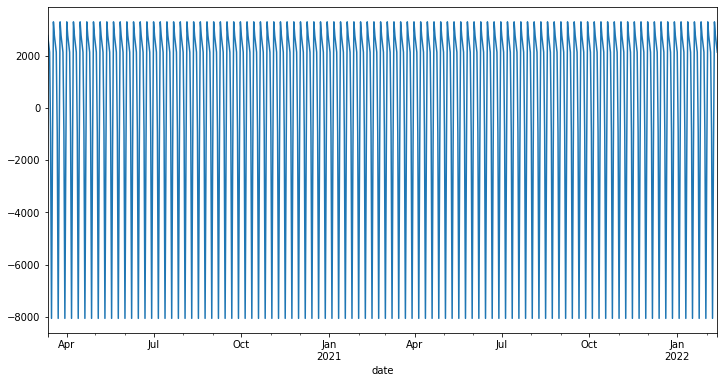

In [ ]:
decomp.seasonal.plot(figsize=(12, 6))

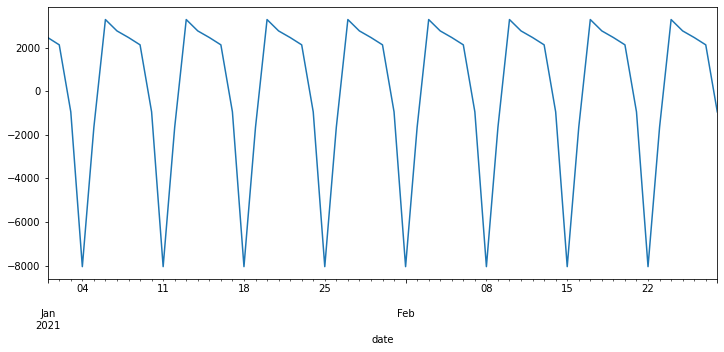

In [ ]:
decomp.seasonal['2021-01':'2021-02'].plot(figsize=(12, 5))

In [ ]:
decomp.seasonal.resample('M').sum()

date
2020-03-31   -3.288165e+03
2020-04-30    6.054885e+03
2020-05-31    3.644484e+03
2020-06-30   -9.699369e+03
2020-07-31    8.518526e+03
2020-08-31   -6.867003e+03
2020-09-30    1.636642e+03
2020-10-31    7.358409e+03
2020-11-30   -8.995051e+03
2020-12-31    4.403362e+03
2021-01-31    3.644484e+03
2021-02-28   -3.751666e-12
2021-03-31   -6.411204e+03
2021-04-30    5.230361e+03
2021-05-31   -6.867003e+03
2021-06-30    1.636642e+03
2021-07-31    7.358409e+03
2021-08-31   -1.064657e+04
2021-09-30    6.054885e+03
2021-10-31    3.644484e+03
2021-11-30   -9.699369e+03
2021-12-31    8.518526e+03
2022-01-31   -6.867003e+03
2022-02-28    8.995051e+03
Freq: M, Name: seasonal, dtype: float64

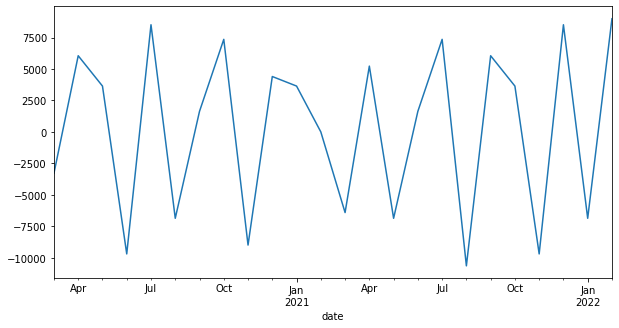

In [ ]:
decomp.seasonal.resample('M').sum().plot(figsize=(10, 5))

There is clearly a seasonal pattern in the series, with an increase in cases followed by a decline in a period of three months

#### Trend

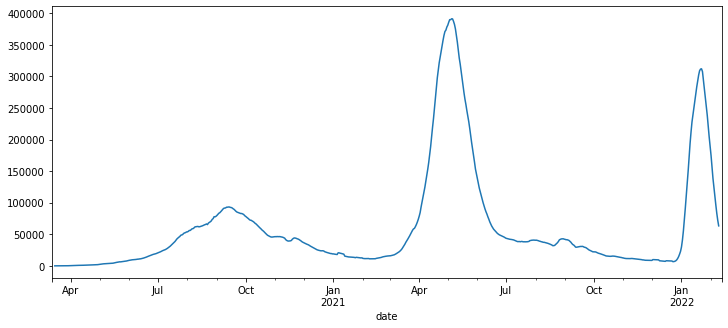

In [ ]:
decomp.trend.plot(figsize=(12, 5))

In [ ]:
trend = pd.DataFrame(decomp.trend)

In [ ]:
trend.reset_index(inplace=True)

In [ ]:
trend.dropna(inplace=True)

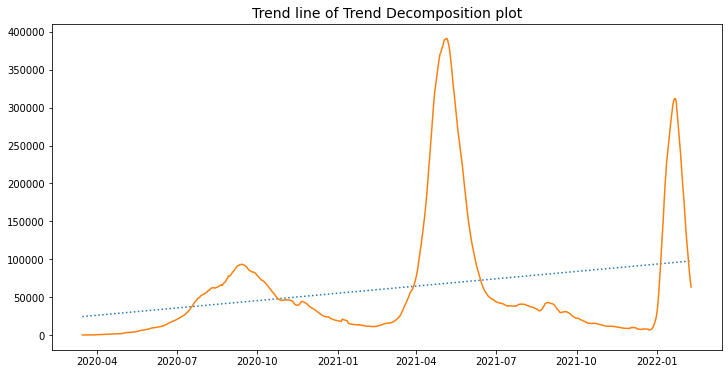

In [ ]:
x = range(0, len(trend.date))

plt.figure(figsize=(12, 6))

z = np.polyfit(x, trend.trend, 1) #fit polynomials
p = np.poly1d(z)
plt.plot(trend.date, p(x), ls=":") #draw trend line
plt.plot(trend.date, trend.trend) #plot decomposed trend
plt.title('Trend line of Trend Decomposition plot', size=14)
plt.show()

Slightly upward trend

#### Residual Noise

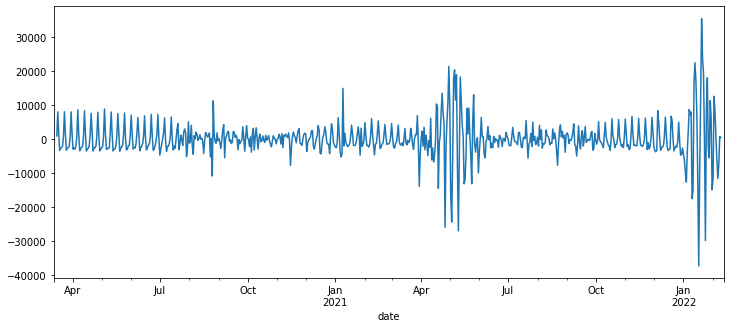

In [ ]:
decomp.resid.plot(figsize=(12, 5))
plt.show()

We can see anomalies corresponding to the three covid waves, so we keep them

### White Noise and Stationarity

As we saw that the series has seasonality and trends and not just noise, we can say the data isn't just white noise.

#### Autocorrelation Plot

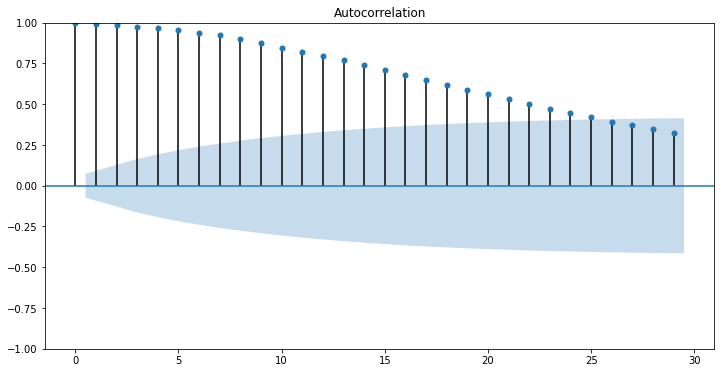

In [ ]:
rcParams["figure.figsize"] = 12, 6
plot_acf(india_cases['new_cases'])
plt.show()

The data clearly isn't stationary and clear decreasing correlation exists between lags. We need to address this further.

### Stationarity

Testing for stationarity using Augmented Dickey Fuller test

- $H_{0}$: The series is non-stationary
- $H_{a}$: The series is stationary
- significance value $\alpha$: 0.05


In [ ]:
def stationarity_test(series, alpha = 0.05):
    result = adfuller(series)
    if result[1] < alpha:
        print(f'The p-value is {result[1]}')
        print(f'\nThe null hypothesis is rejected; The series is stationary.')
    else:
        print('Failed to reject the null hypothesis; The series is non-stationary')

In [ ]:
stationarity_test(india_cases['new_cases'])

Failed to reject the null hypothesis; The series is non-stationary


In [ ]:
india_cases['diff_one'] = india_cases['new_cases'].diff()

In [ ]:
stationarity_test(india_cases['diff_one'].dropna())

The p-value is 5.730549771108756e-08

The null hypothesis is rejected; The series is stationary.


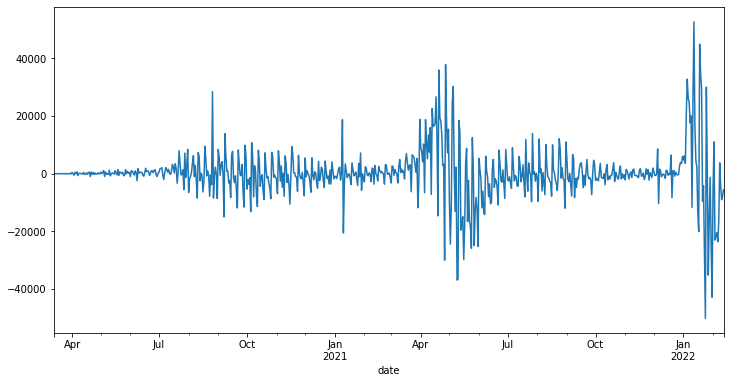

In [ ]:
india_cases['diff_one'].dropna().plot(figsize=(12, 6))

In [ ]:
india_cases['log_transorm'] = np.log(india_cases['new_cases'])

In [ ]:
india_cases.head()

,new_cases,diff_one,log_transorm
date,,,
2020-03-12,11.0,NaN,2.397895
2020-03-13,9.0,-2.0,2.197225
2020-03-14,20.0,11.0,2.995732
2020-03-15,11.0,-9.0,2.397895
2020-03-16,6.0,-5.0,1.791759


In [ ]:
stationarity_test(india_cases['log_transorm'])

Failed to reject the null hypothesis; The series is non-stationary


In [ ]:
india_cases['log_diff'] = india_cases['log_transorm'].diff()

In [ ]:
stationarity_test(india_cases['log_diff'].dropna())

The p-value is 2.0742354482992563e-05

The null hypothesis is rejected; The series is stationary.


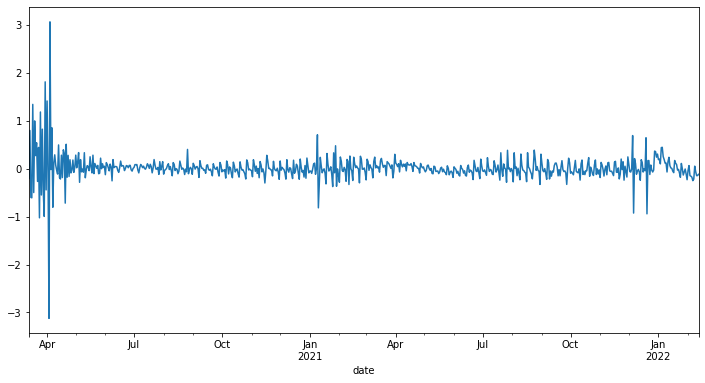

In [ ]:
india_cases['log_diff'].dropna().plot(figsize=(12, 6))

To make the series stationary we tried two methods:
1. Differencing- first order differencing made the series sationary
2. Log transformation and first order differencing also made the series stationary
3. Log differencing appears more accurate

#### ACF & PACF Plots

- We can select the order p for AR(p) model based on significant spikes from the PACF plot. One more indication of the AR process is that the ACF plot decays more slowly.
- The MA(q) model calculates its forecast value by taking a weighted average of past errors.
- In contrast to the AR model, we can select the order q for model MA(q) from ACF if this plot has a sharp cut-off after lag q.

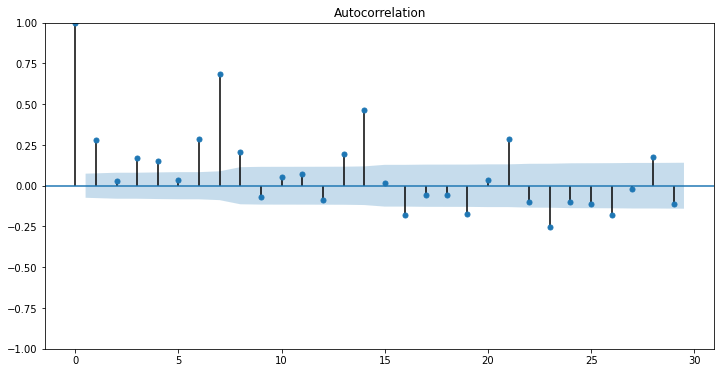

In [ ]:
plot_acf(india_cases['diff_one'].dropna())
plt.show()

From the ACF Plot, we can see 6, 7, 14 are valid p values

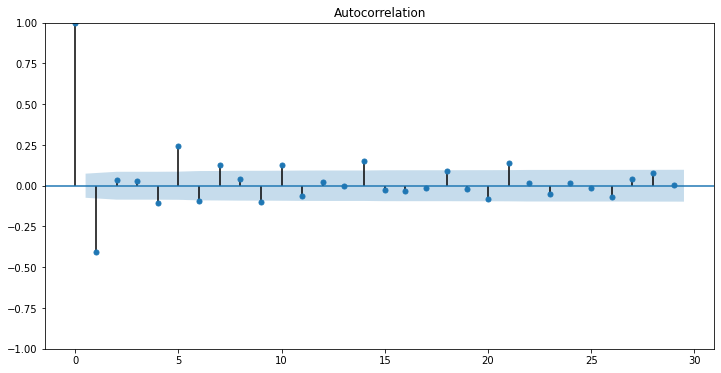

In [ ]:
plot_acf(india_cases['log_diff'].dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


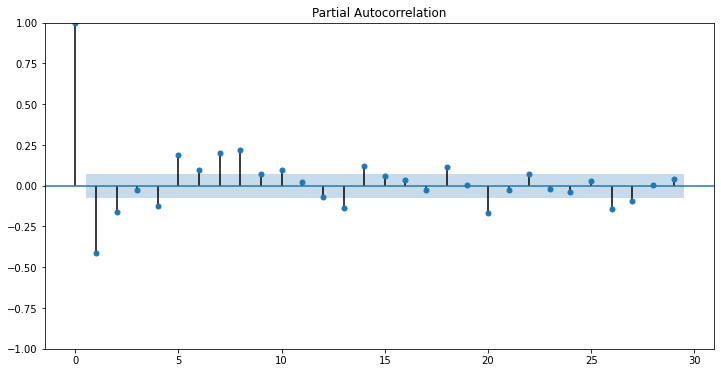

In [ ]:
plot_pacf(india_cases['log_diff'].dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


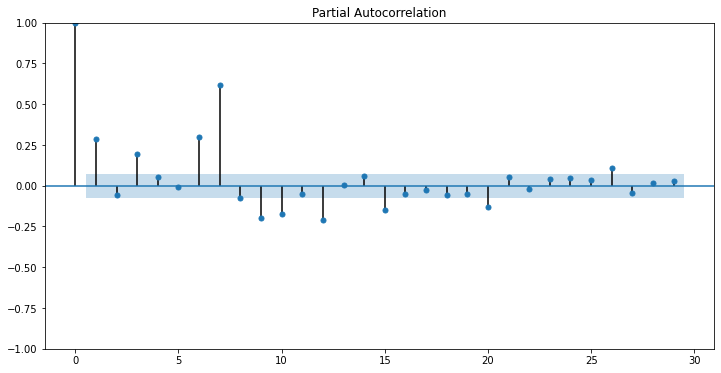

In [ ]:
plot_pacf(india_cases['diff_one'].dropna())
plt.show()

From PACF plot 1, 7 are valid q values.

- From plots, we can say that ARMA models will be suitable for forecasting.
- Since our data exhibited seasonality also, ARIMA or SARIMA may be better suited
- D or difference value is one as first order differencing made the series stationary